# Predavanje 4

## Matplotlib

Prvo učitamo biblioteku, i kažemo da će se slike renderirati u bilježnici, ali praćene kao zasebni objekti. `%matplotlib inline` ima negativnu stranu da sve vezano uz pojedinu sliku moramo napisati u jednoj ćeliji; ne možemo graditi sliku "po dijelovima" i onda je samo jednom prikazati. Tako je puno teže učiti što se zbiva.

In [ ]:
%matplotlib -l

In [ ]:
%matplotlib agg

In [ ]:
import matplotlib.pyplot as plt

Matplotlib ima nekoliko načina upotrebe. Najjednostavniji, direktno preko `plt.` metodâ (kao što je `plt.plot`), pretpostavlja da u svakom trenutku imamo jednu sliku na kojoj implicitno radimo --- na kraju izvršavanja ćelije se ta slika renderira u bilježnicu. Taj pristup je u redu za `inline` mod, ali je prilično beskoristan u ostalim slučajevima. Zato ćemo pokazati "objektni" način, gdje možemo na sliku referirati kao što je uobičajeno u Pythonu: preko imena objekata.

Tradicionalni nazivi za objekte koji omogućuju crtanje su `fig` (_figure_ --- sama površina po kojoj se crta) i `ax` (_axes_ --- koordinatni sustav koji posjeduje brojne metode za crtanje).

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Proba')
ax1.plot([1, 2, 3], [5, 7, 2], marker='d')
ax1.plot([3, 4, 2, 0], [1, 8, 3, 4], marker='o')

In [ ]:
fig1

`plot` metodu smo već upoznali, ona prima dvije jednako dugačke liste (ili Numpy arraya) apscisâ i ordinatâ, crta odgovarajuće točke i spaja ih linijom. [Mnoge druge metode](https://matplotlib.org/api/axes_api.html#basic) imaju slično sučelje, pa ćemo prikazivati kako ono funkcionira uglavnom na primjeru `plot` metode.

Pored obaveznih parametara (lista `x`eva i `y`ova), možemo dati još mnoge [imenovane parametre](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) koji određuju stil. Inače, Matplotlib će različitim linijama dodijeliti različite automatski odabrane stilove.

In [ ]:
ax1.plot([2, 5], [-1, 1], color='red', marker='x')
fig1

In [ ]:
ax1.set_ylabel('ordinata')
ax1.set_xlim(-2, 3)
fig1

In [ ]:
fig2, (ax11, ax12) = plt.subplots(2, sharex=True, sharey=True)

In [ ]:
ax11.set(xlim=(0, 2), ylim=(0, 2))
ax11.text(1, 1, 'Matematički')
ax12.text(1, 1, 'softver')

In [ ]:
fig2

In [ ]:
import numpy as np
fig3, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x2 = np.linspace(0, 2, 1000)
lijevo.plot(x2, x2**2)
desno.plot(x2, x2**3)
fig3

In [ ]:
fig4, ax4 = plt.subplots()
ax4.plot(x2, np.exp(x2), label=r'$e^{x}$', linestyle='--')
ax4.plot(x2, np.sqrt(13 * x2), label=r'$\sqrt{13x}$', color='red', marker='d', markevery=70)
ax4.legend(loc=9)
fig4

In [ ]:
fig6, ((gl, gs, gd), (dl, ds, dd)) = plt.subplots(2, 3)
fig6.tight_layout()
x = np.linspace(0, 7)[1:]
gl.plot(x, 1/x)
gs.plot(x, x)
gd.plot(x, np.cos(x))
dl.plot(np.sin(x), np.cos(x))
ds.plot(x, np.exp(x))
dd.plot(x, np.log(x))
fig6

In [ ]:
dir(ax1)

In [ ]:
ax1.violinplot?

In [ ]:
astro = plt.imread('astro.png')
astro.shape

In [ ]:
figa, axa = plt.subplots()
axa.imshow(astro)
figa

In [ ]:
axa.get_ylim()

`astro` je najobičniji Numpy array, a ako ga srežemo na dubinu 1, možemo i zadati [colormap](https://matplotlib.org/examples/color/colormaps_reference.html) koji kaže kako će se brojčane vrijednosti prikazivati.

In [ ]:
axa.imshow(astro[100:150, 200:250, 2], cmap='autumn')
figa

In [ ]:
np.array([[2, 3, 5], [7, 9, 0]]).ravel()

Još neki zanimljivi primjeri mogu se naći na https://matplotlib.org/tutorials/introductory/images.html.

In [ ]:
tri_kocke = np.random.uniform(1, 6, (100_000, 3)).sum(axis=1)
slika, koord = plt.subplots()
koord.hist(tri_kocke, bins=range(19))
slika

In [ ]:
with plt.xkcd():
    figxkcd, axkcd = plt.subplots()
    x = np.linspace(-1, 2 * np.pi, 100)
    axkcd.plot(x, x * np.cos(x))
    axkcd.annotate('ishodište', (0, 0), (0, -2), arrowprops=dict(arrowstyle='->'))
figxkcd

In [ ]:
plt.rcdefaults()

In [ ]:
bodovi = {
    'Marko': 15,
    'Silvija': 52,
    'Ornela': 40,
    'Kristijan': 31,
    'Petar': 17,
    'Ivanka': 22,
}
with plt.style.context('seaborn'):
    slika, crtaj = plt.subplots()
    crtaj.barh(list(bodovi.keys()), list(bodovi.values()))
slika

In [ ]:
plt.style.available

In [ ]:
fig6.canvas.get_supported_filetypes_grouped()

In [ ]:
fig6.savefig('6 grafova.pdf')

Detaljnije na https://matplotlib.org/tutorials/introductory/lifecycle.html.

In [5]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib agg

In [6]:
fig3d = plt.figure()
ax3d = fig3d.add_subplot(1, 1, 1, projection='3d')

In [8]:
import numpy as np
x1, y1 = np.meshgrid([2, 5], [7, 8, 9])

In [9]:
x1

array([[2, 5],
       [2, 5],
       [2, 5]])

In [10]:
y1

array([[7, 7],
       [8, 8],
       [9, 9]])

In [11]:
x1 + y1

array([[ 9, 12],
       [10, 13],
       [11, 14]])

In [12]:
x, y = np.meshgrid(np.linspace(-2, 2), np.linspace(0, 4))
z = np.cos(x + np.sqrt(y))

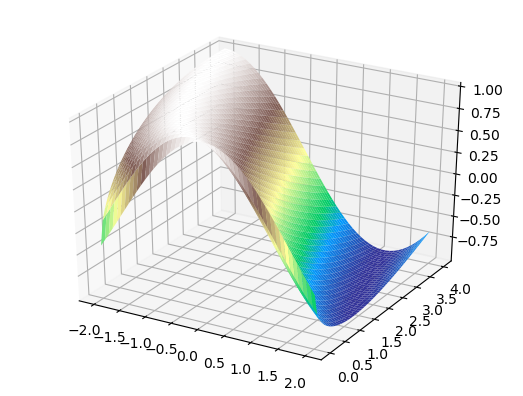

In [13]:
ax3d.plot_surface(x, y, z, cmap='terrain', linewidth=1)
fig3d

Više na https://matplotlib.org/tutorials/introductory/sample_plots.html.

## Sympy

In [14]:
import sympy as sp

In [15]:
sp.init_printing()

In [17]:
sp.var('x,y,z')

In [18]:
x

In [19]:
x+y

In [21]:
(sp.pi + x)**2

In [22]:
x = sp.Symbol('x', positive=True)

In [24]:
x > -2

In [26]:
sp.sqrt(x**2)

In [27]:
y = sp.Symbol('y')

In [28]:
sp.sqrt(y**2)

In [29]:
z = sp.Symbol('z', real=True)

In [30]:
sp.sqrt(z**2)